In [2]:
import json

output_filename = 'user_data/answers_female_total.json'

with open(output_filename, 'r') as file: # change the filename
    female_dict = json.load(file)

output_filename = 'user_data/answers_male_sample.json'

with open(output_filename, 'r') as file: # change the filename
    male_dict = json.load(file)

In [3]:
import pandas as pd
user_female = pd.read_csv('user_data/user_female_total.csv')
user_male = pd.read_csv('user_data/user_male_sample.csv')

In [11]:
# female_dict['148870'][0]['response_with_scores'][0]['sentiment_score']

female_results = {}

def get_user_score(user_df,score_dict):
    score_result = {}
    for i in user_df['user_id']:
        answers = score_dict[str(i)]
        score = 0.0
        answer_num = 0
        for answer in answers:
            if len(answer['response_with_scores']) > 0:
    #         print(i, float(answer['response_with_scores'][0]['sentiment_score']))
                score += float(answer['response_with_scores'][0]['sentiment_score'])
        if len(answers) > 0:
            score_result[str(i)] = score/len(answers)
        else:
            score_result[str(i)] = -1.0
    return score_result

female_results = get_user_score(user_female,female_dict)
male_results = get_user_score(user_male,male_dict)
male_results


{'643383': 0.5478000000000001,
 '2149852': 0.6314,
 '1028762': 0.5695652173913043,
 '3208492': 0.5419047619047619,
 '975132': 0.6000000000000001,
 '2898065': 0.49180000000000007,
 '5718237': 0.6339130434782608,
 '4147362': 0.6912499999999999,
 '4624291': 0.5583333333333335,
 '234122': 0.51,
 '1653919': 0.5650000000000001,
 '2876861': 0.5258000000000002,
 '225074': 0.6734,
 '337055': 0.5822,
 '924077': 0.524,
 '351688': 0.5082857142857142,
 '31891': 0.4977777777777778,
 '6860421': 0.5661999999999999,
 '267263': 0.6758,
 '1577959': 0.5647619047619047,
 '8345637': 0.64375,
 '580530': 0.6420000000000001,
 '2124732': 0.5731818181818182,
 '5487': 0.5700000000000001,
 '2249778': 0.58,
 '361494': 0.4225,
 '4197505': 0.5576,
 '1215872': 0.6222727272727272,
 '188756': 0.94,
 '1169194': 0.7561538461538462,
 '1086232': 0.278,
 '1550612': 0.61,
 '129372': 0.6187999999999999,
 '992306': 0.5733333333333334,
 '995258': 0.5753333333333333,
 '61311': 0.5117999999999999,
 '2050505': 0.6323076923076923,
 

In [12]:
def get_score_range(original):
    ranges =[-1.1,0.0,0.2,0.4,0.6,0.8,1.0]
    df = pd.DataFrame(list(original.values()))
    df2 = df.groupby(pd.cut(df[0], ranges)).count()
    return list(df2[0])
female_score_range = get_score_range(female_results)
male_score_range = get_score_range(male_results)
male_score_range


[13, 9, 34, 830, 551, 13]

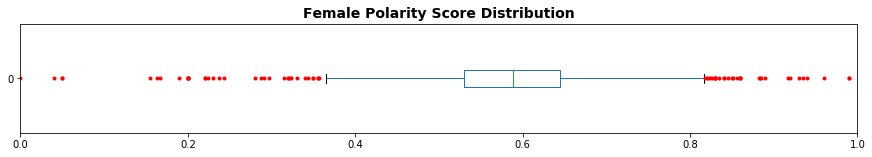

In [27]:
import matplotlib.pyplot as plt

def get_box_plot(original,label):
    # plot the price distribution box after dropping the listings
    df = pd.DataFrame(list(original.values()))
    box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
    price_dist = df[0].plot(kind='box', xlim=(0,1), vert=False, flierprops=box_plot, figsize=(15,2));
    plt.title(label, fontsize=14, fontweight='bold')
    price_dist
get_box_plot(female_results,'Female Polarity Score Distribution')


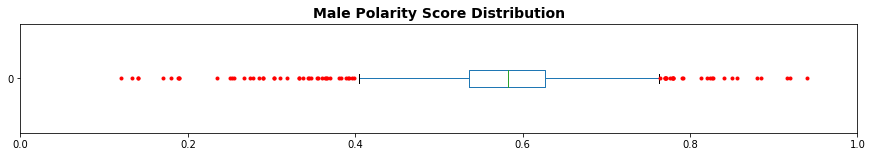

In [28]:
get_box_plot(male_results,'Male Polarity Score Distribution')

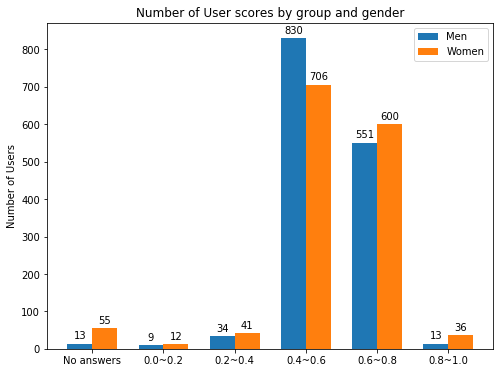

<Figure size 576x432 with 0 Axes>

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

label = ['No answers','0.0~0.2','0.2~0.4','0.4~0.6','0.6~0.8','0.8~1.0']

# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels = label
women_means = female_score_range
men_means = male_score_range
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Users')
ax.set_title('Number of User scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
figure(figsize=(8,6))

# fig.tight_layout()

plt.show()

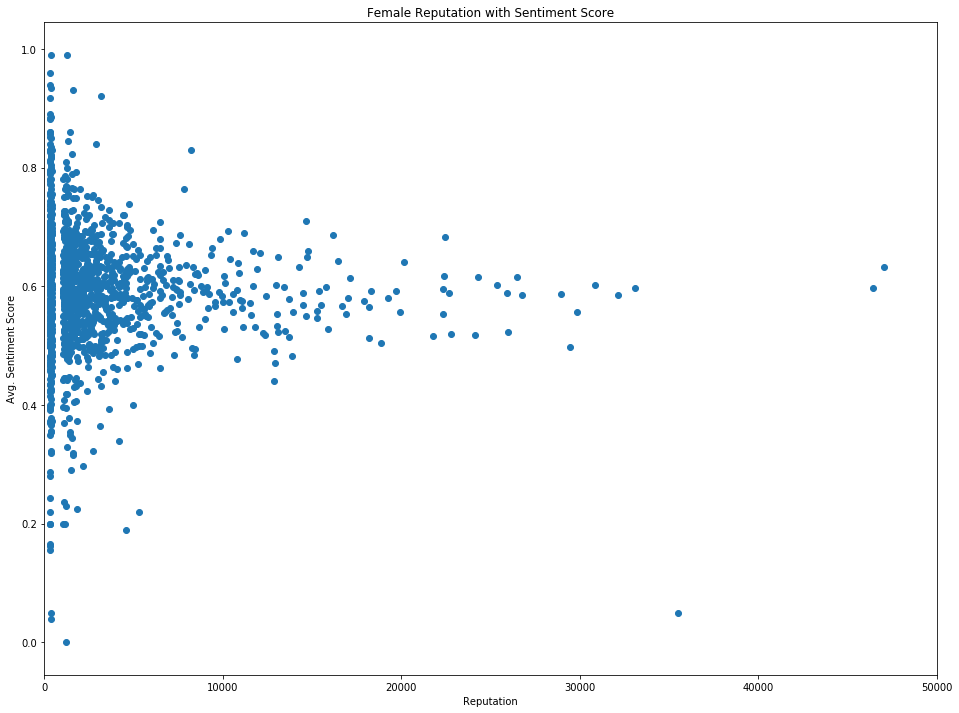

In [80]:
from matplotlib.pyplot import figure

female_results
user_female['reputation']
def get_SA_reputation_plot(score_sa, user_data,title):
    reputation = []
    score = []
    for i in zip(user_data['user_id'],user_data['reputation']):
        if(score_sa[str(i[0])] != -1.0):
            score.append(score_sa[str(i[0])])
            reputation.append(i[1])
    figure(figsize=(16,12))    
    plt.xlim([0,50000])
    plt.xlabel('Reputation')
    plt.ylabel('Avg. Sentiment Score')
    plt.title(title)
    plt.scatter(reputation, score)
    
get_SA_reputation_plot(female_results,user_female,'Female Reputation with Sentiment Score')

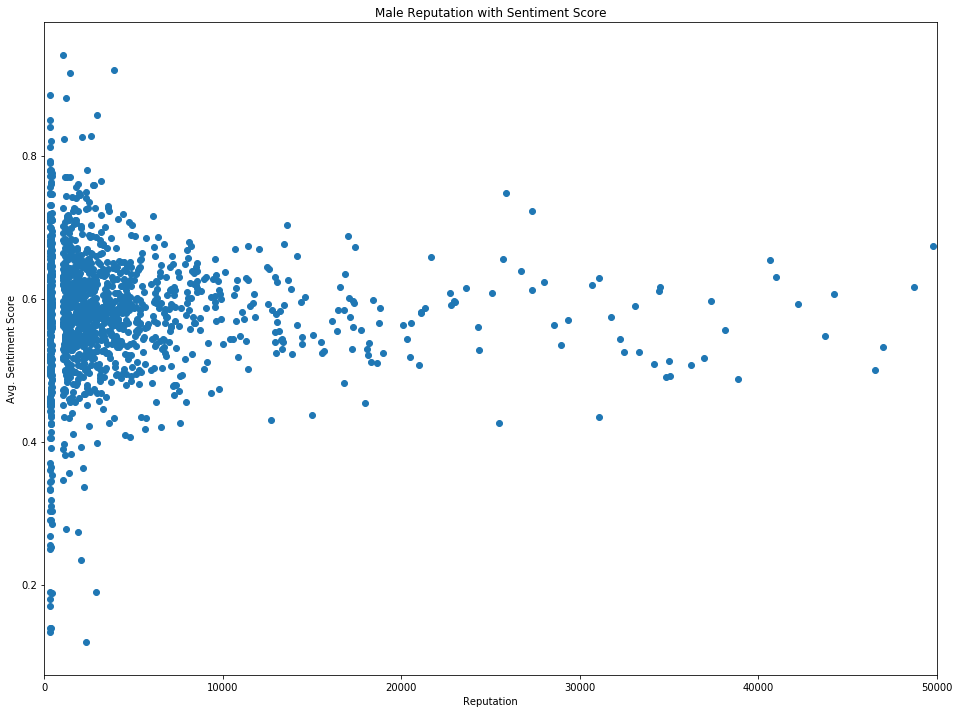

In [69]:
get_SA_reputation_plot(male_results,user_male,'Male Reputation with Sentiment Score')

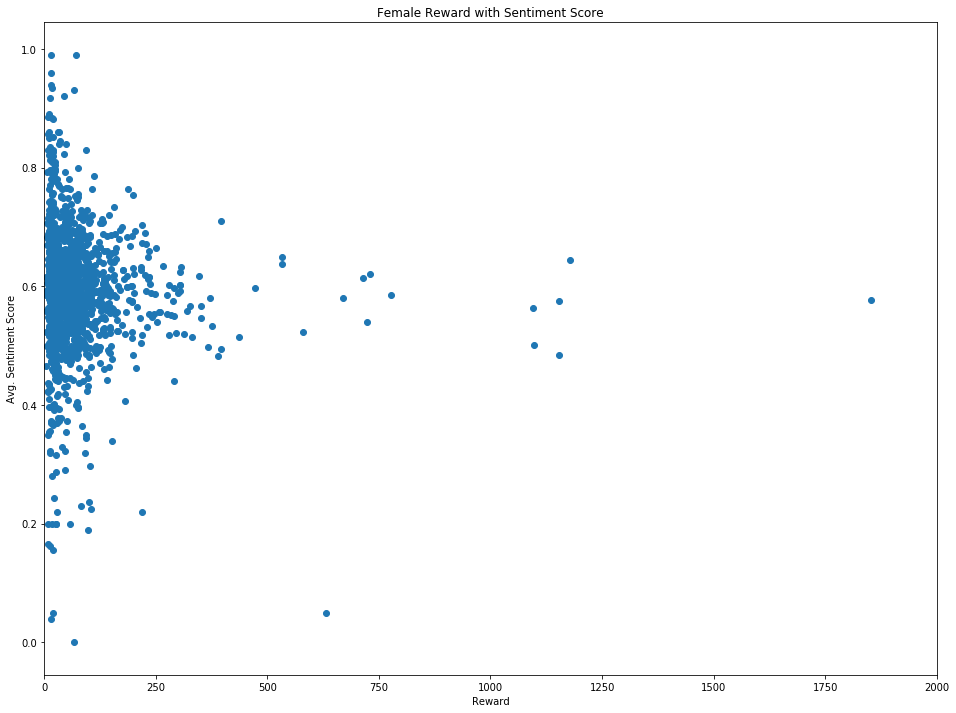

In [94]:
import ast

def convert_badge_to_reward(df):
    reward = []
    for idx,row in df.iterrows():
        badges = ast.literal_eval(row['badge_counts'])
        reward.append(badges['bronze'] * 1 + badges['silver'] * 2 + badges['gold'] * 3)
    return reward
reward_female = convert_badge_to_reward(user_female)
reward_female

user_female['reward'] = reward_female
user_female

def get_SA_reward_plot(score_sa, user_data,title):
    reward = []
    score = []
    for i in zip(user_data['user_id'],user_data['reward']):
        if(score_sa[str(i[0])] != -1.0):
            score.append(score_sa[str(i[0])])
            reward.append(i[1])
    figure(figsize=(16,12))    
    plt.xlim([0,2000])
    plt.xlabel('Reward')
    plt.ylabel('Avg. Sentiment Score')
    plt.title(title)
    plt.scatter(reward, score)
get_SA_reward_plot(female_results,user_female,'Female Reward with Sentiment Score')

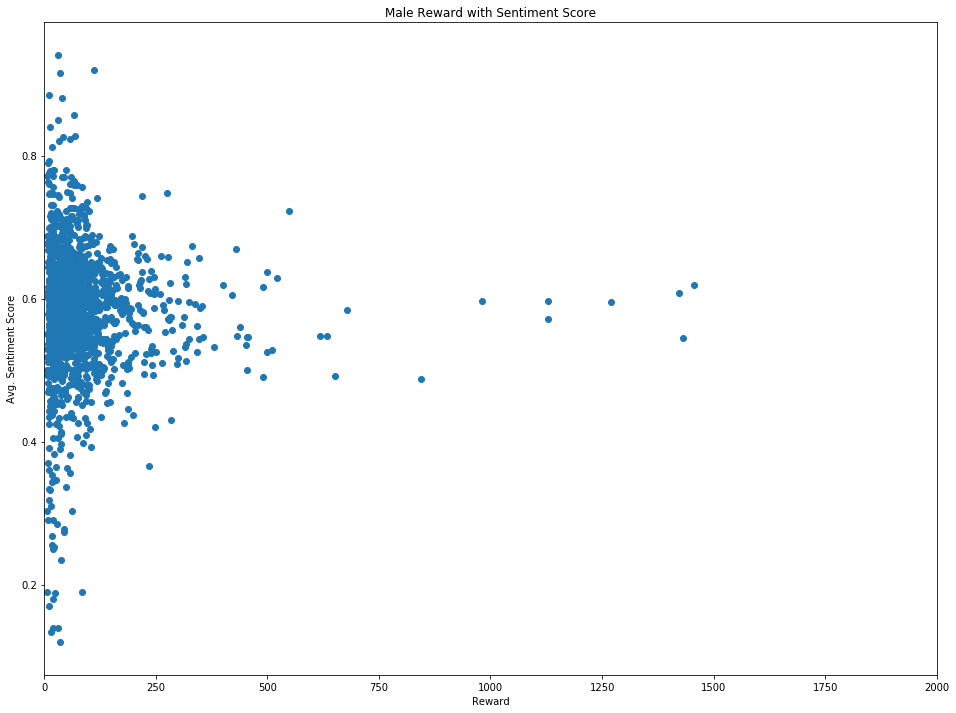

In [96]:
reward_male = convert_badge_to_reward(user_male)

user_male['reward'] = reward_male
user_male
get_SA_reward_plot(male_results,user_male,'Male Reward with Sentiment Score')

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

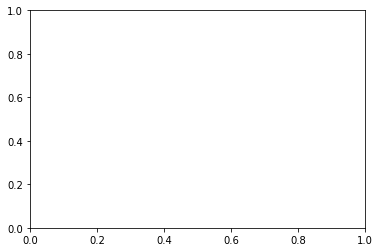

In [77]:
def get_SA_reputation_plot_combine(score_sa, user_data,title):
    color = ['orange','blue']
    for gender in range(len(score_sa)):
        reputation = []
        score = []
        for i in zip(user_data[gender]['user_id'],user_data[gender]['reputation']):
            if(score_sa[gender][str(i[0])] != -1.0):
                score.append(score_sa[gender][str(i[0])])
                reputation.append(i[1])
        plt.scatter(reputation, score, color[gender])
    figure(figsize=(19,12))    
    plt.xlim([0,50000])
    plt.xlabel('Reputation')
    plt.ylabel('Avg. Sentiment Score')
    plt.title(title)
    plt.show()

get_SA_reputation_plot_combine([female_results,male_results],[user_female,user_male],"Combine")
